## Step 1. Follow along with the tutorial to gain an understanding of the process

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Step 2. In a new .ipynb notebook, reproduce the results utilizing the original MNIST dataset (built into tf.keras.datasets)

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Understanding the structure of trained images
x_train.shape

(60000, 28, 28)

We can see that there are 60000 training images each with a shape of 28x28. This 28x28 matrix consists of the pixels in the images

In [4]:
# Some of the labels in the training labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
x_test.shape

(10000, 28, 28)

We can see that there are 60000 training images each with a shape of 28x28. This 28x28 matrix consists of the pixels in the images

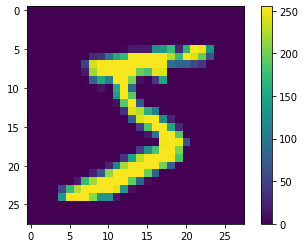

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Resizing The pixel values between 0 and 1.

In [7]:
x_train = x_train / 255.0

x_test = x_test / 255.0

### Printing few training data

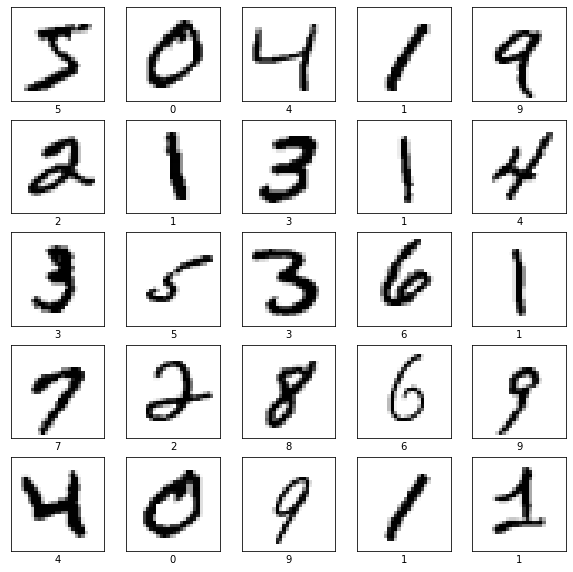

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

### Neural Network model 

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2590 - accuracy: 0.9262
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1131 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0780 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0596 - accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0458 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0364 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0232 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0187 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.017

### Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

In [12]:
train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)

print('\nTrain accuracy:', round(train_acc,4))

1875/1875 - 1s - loss: 0.0143 - accuracy: 0.9956

Train accuracy: 0.9956


In [13]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', round(test_acc,4))

313/313 - 0s - loss: 0.0845 - accuracy: 0.9767

Test accuracy: 0.9767


We can notice here that the training accuracy is higher than testing accuracy which means that the model is overfitting the training data. The Neural model has generalized the training data almost completely. However, it is not able to generalize on the testing labels on the same level. 

## Step 4. Choose one of the proposed modifications below:
<br> Add another Dense layer of 128 nodes
<br> Increase the current number of nodes in the layer to 256

### Increase the current number of nodes in the layer to 256

The model should be able to fit the training data better than the one used before as we have used a more complex model. A complex model can help in getting a better accuracy on the training dataset. Since the difference between training and testing accuracy is not much, this new model could predict better on test dataset.  

### Step 5. Modify the model based on the chosen method and train

In [14]:
model_new = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model_new.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
history=model_new.fit(x_train, y_train,validation_data=(x_test,  y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2287 - accuracy: 0.9328 - val_loss: 0.1113 - val_accuracy: 0.9666
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0933 - accuracy: 0.9717 - val_loss: 0.0811 - val_accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0619 - accuracy: 0.9813 - val_loss: 0.0856 - val_accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0769 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0704 - val_accuracy: 0.9794
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0250 - accuracy: 0.9916 - val_loss: 0.0691 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.0724 - val_accuracy:

Text(0.5, 1.0, 'Training and Validation Accuracy')

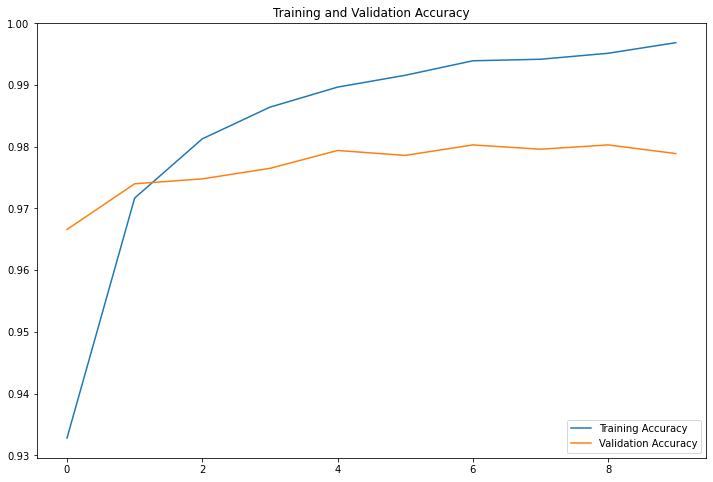

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(12, 8))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

We can still witness some overfitting. However, this new model is able to perform slightly better on the test set. This is sue to the fact that we have used a slightly complex model that before when we knew that the overfitting factor is less. 

In [18]:
train_loss_new, train_acc_new = model_new.evaluate(x_train,  y_train, verbose=2)

print('\nTrain accuracy:', round(train_acc_new,4))

1875/1875 - 2s - loss: 0.0061 - accuracy: 0.9984

Train accuracy: 0.9984


In [19]:
test_loss_new, test_acc_new = model_new.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', round(test_acc_new,4))

313/313 - 0s - loss: 0.0780 - accuracy: 0.9789

Test accuracy: 0.9789


## Step 6. Report on the results of the modified model and if it matches your hypothesis

In [20]:
print("Old Model: \n")
print("Train accuracy: ", round(train_acc,4))
print('Test accuracy: ', round(test_acc,4))

print("\nNew Model: \n")
print("Train accuracy: ", round(train_acc_new,4))
print('Test accuracy: ', round(test_acc_new,4))

Old Model: 

Train accuracy:  0.9956
Test accuracy:  0.9767

New Model: 

Train accuracy:  0.9984
Test accuracy:  0.9789


It can be see that the new model performs slightly better than old model in terms of accuracy which is what I had hypothesized. The reason for the above result is that we have used a slightly complicated model which increased the training accuracy. The testing accuracy has also increased as compared to the previous model because the difference between training and testing accuracy was pretty less. 